- ID: id único del registro (Entero).
- Región: región de la oportunidad (Categórica).
- Territory: territorio comercial de la oportunidad (Categórica).
- Pricing, Delivery_Terms_Quote_Approval: variable que denomina si la oportunidad necesita aprobación especial de su precio total y los términos de la entrega (Binaria).
- Pricing, Delivery_Terms_Approved: variable que denomina si la oportunidad obtuvo aprobación especial de su precio total y los términos de la entrega (Binaria).
- Bureaucratic_Code_0_Approval: variable que denomina si la oportunidad necesita el código burocrático 0 (Binaria).
- Bureaucratic_Code_0_Approved: variable que denomina si la oportunidad obtuvo el código burocrático 0 (Binaria).
- Submitted_for_Approval: variable que denomina si fue entregada la oportunidad para la aprobación (Binaria).
- Bureaucratic_Code: códigos burocráticos que obtuvo la oportunidad (Categórica).
- Account_Created_Date: fecha de creación de la cuenta del cliente (Datetime).
- Source: fuente de creación de la oportunidad (Categórica).
- Billing_Country: país donde se emite la factura (Categórica).
- Account_Name: nombre de la cuenta del cliente (Categórica).
- Opportunity_Name: nombre de la oportunidad (Categórica).
- Opportunity_ID: id de la oportunidad (Entero).
- Sales_Contract_No: número de contrato (Entero).
- Account_Owner: vendedor del equipo comercial responsable de la cuenta cliente (Categórica).
- Opportunity_Owner: vendedor del equipo comercial responsable de la oportunidad comercial (Categórica).
- Account_Type: tipo de cuenta cliente (Categórica).
- Opportunity_Type: tipo de oportunidad (Categórica).
- Quote_Type: tipo de presupuesto (Categórica).
- Delivery_Terms: términos de entrega (Categórica).
- Opportunity_Created_Date: fecha de creación de la oportunidad comercial (Datetime).
- Brand: marca del producto (Categórica).
- Product_Type: tipo de producto (Categórica).
- Size: tamaño del producto (Categórica).
- Product_Category_B: categoría 'B' del producto (Categórica).
- Price: precio (Decimal).
- Currency: moneda (Categórica).
- Last_Activity: fecha de la última actividad (Datetime).
- Quote_Expiry_Date: fecha de vencimiento del presupuesto (Datetime).
- Last_Modified_Date: fecha de ultima modificación en la oportunidad (Datetime).
- Last_Modified_By: usuario responsable de la última modificación en la oportunidad (Categórica).
- Product_Family: familia de producto (Categórica).
- Product_Name: nombre del producto (Categórica).
- ASP_Currency: moneda del precio promedio (Categórica).
- ASP: (Average Selling Price) precio promedio a la venta (Decimal).
- ASP_(converted)_Currency: moneda del precio promedio convertido en la variable (Categórica)
- ASP_(converted): precio promedio a la venta convertido a otra moneda (Decimal).
- Planned_Delivery_Start_Date: límite inferior del rango previsto para la fecha de entrega (Datetime).
- Planned_Delivery_End_Date: límite superior del rango previsto para la fecha de entrega (Datetime).
- Month: mes-año de Planned_Delivery_Start_Date (Fecha).
- Delivery_Quarter: trimestre de Planned_Delivery_Start_Date (Categorica).
- Delivery_Year: año de Planned_Delivery_Start_Date (Fecha).
- Actual_Delivery_Date: fecha real de la entrega (Datetime).
- Total_Power: potencia del producto (Entero).
- Total_Amount_Currency: moneda del monto total (Decimal).
- Total_Amount: monto total (Decimal).
- Total_Taxable_Amount_Currency: moneda del monto gravado total (Categórica).
- Total_Taxable_Amount: monto gravado total (Categórica).
- Stage: variable target. Estado de la oportunidad (Categórica).
- Prod_Category_A: categoría 'A' del producto (Categórica).
- Total_Power_Discreet: categorización de la variable Total Power en bins (Categórica).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib
import plotly as py
import plotly.express as px 
import matplotlib.ticker as ticker
plt.style.use('default')
import plotly.offline as opy
import plotly.figure_factory as ff
import plotly.io as pio
from wordcloud import WordCloud

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format 

import warnings
warnings.filterwarnings('ignore')


In [2]:
entrenamiento = pd.read_csv('Entrenamieto_ECI_2020.csv')
entrenamiento.head()


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.59,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.60,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


### Datos de interes

Notacion: % datos. Datos de interes
- ID: 100%. No hay ids repetidos, esperable
- Region: 100%. Solo hay 5 valores: Japan, EMEA, Americas, APAC, Middle East
- Territory: 70,5%. Hay 76 valores
- Pricing, Delivery_Terms_Quote_Appr: 100%. Es un booleano
- Pricing, Delivery_Terms_Approved: 100%. Es un booleano
- Bureaucratic_Code_0_Approval: 100%. Es un booleano
- Bureaucratic_Code_0_Approved: 100%. Es un booleano
- Submitted_for_Approval: 100%. Todos los campos son 0, no aporta informacion
- Bureaucratic_Code: 100%. Solo hay 7 valores, 2 de los cuales solo tienen 3 datos. Se dejan solo 5
- Account_Created_Date: 100%. Son 809 valores
- Source: 42,4%. Son 13 valores, 3 de los cuales tienen solo 10 datos. Se dejan solo 10
- Billing_Country: 100%. Son 80 valores, concentrando el 50% de los datos los valores que aparecen menos de 10 veces.
- Account_Name: 100%. Son 1635 valores
- Opportunity_Name: 100%. Son 9841 valores
- Opportunity_ID: 100%. Son 9841 valores, de los cuales el 29,6% tiene mas de un registro


### Preparacion del df

In [3]:
def convertirATiempo(df,lista):
    for columna in lista:
        df[columna] = pd.to_datetime(df[columna])
    return df

def convertirATipo(df,lista,tipo):
    for columna in lista:
        df[columna] = df[columna].astype(tipo)
    return df

def convertirAFlotante(df,lista):
    for columna in lista:
        df[columna] = df[columna].apply(lambda x: None if (x == "None" or x == "Other") else float(x))
    return df

def establecerTipos(df):
    """cambia los tipos de las columnas"""
    
    #fechas
    listaDeColumnasFechas = ['Account_Created_Date','Opportunity_Created_Date','Quote_Expiry_Date','Last_Modified_Date','Delivery_Year','Planned_Delivery_End_Date','Planned_Delivery_Start_Date']
    df = convertirATiempo(df,listaDeColumnasFechas)
    #enteros
    listaDeColumnasEnteras = ['ID','Opportunity_ID']
    convertirATipo(df,listaDeColumnasEnteras,'int')
    #decimales
    listaDeColumnasEnteras = ['Price','ASP','ASP_(converted)','Total_Taxable_Amount','Total_Amount']
    convertirAFlotante(df,listaDeColumnasEnteras)
    #booleanos
    listaDeColumnasBooleanas = ['Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved','Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved']
    convertirATipo(df,listaDeColumnasBooleanas,'bool')
    #categoricas
    listaDeColumnasCategoricas = ['Product_Category_B','Product_Family','Region','Territory','Bureaucratic_Code','Source ','Billing_Country','Account_Name','Opportunity_Name']
    convertirATipo(df,listaDeColumnasCategoricas,'category')
    return df

def eliminarColumnasSinImportancia(df):
    #"Last_Activity" y "Actual_Delivery_Date" son puros nulos
    #"Submitted_for_Approval" puros valores nulos
    #"Prod_Category_A" tiene todos sus valores iguales
    df = df.drop(['Submitted_for_Approval','Last_Activity','Actual_Delivery_Date','Prod_Category_A'], axis=1)
    return df

def agragarColumnas(df):
    df['Closed'] = df['Stage'].replace({'Closed Won': True, 'Closed Lost': True, 'Negotiation':False,'Proposal':False,'Qualification':False})#"Source " columna con un espacio en el nombre
    df['Won'] = df['Stage'].replace({'Closed Won': True, 'Closed Lost': False, 'Negotiation':False,'Proposal':False,'Qualification':False})#"Source " columna con un espacio en el nombre
    return df

#def unaFilaUnaOportunidad(df):
#    """se supone que en el df original puede haber mas de una fila por oportunidad de negocio"""
#    return df

def correccionDeTerritorios(df):
    #se refiere a diferentes partes de usa
    df = df.replace({'Territory':{'Central US':'USA','NE America':'USA', 'NW America':'USA','SW America':'USA','SE America':'USA'}})
    #se refiere a diferentes partes de usaSaudi Arabia
    df = df.replace({'Territory':{'KSA':'Saudi Arabia'}})
    #No se ha encontrado la dorma de los siguientes datos 'Kosovo','South America', 'South East Asia', 'UAE (Dubai)', 'UAE (Others)' (en el caso de kosovo no lo grafica)
    return df

def preparacionDelDataFrame(df):
    df = eliminarColumnasSinImportancia(df)
    df = establecerTipos(df)
    #df = unaFilaUnaOportunidad(df)
    df = correccionDeTerritorios(df)
    df = agragarColumnas(df)
    df.rename(columns = {'Source ':'Source'}, inplace = True)
    return df
    
entrenamiento = preparacionDelDataFrame(entrenamiento)
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 4   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 5   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 6   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  category      
 10  Billing_Country       

In [4]:
entrenamiento['Territory'].value_counts()

None              4999
USA               3281
Germany           1682
Australia         1208
India              809
                  ... 
Croatia              1
Georgia              1
Burma                1
Monaco               1
Czech Republic       1
Name: Territory, Length: 71, dtype: int64

### agrupacion de oportunidades

In [55]:
def agrupacionDeOportunidades(df):
  df['modificaciones'] = 1
  data = df.groupby('Opportunity_ID').agg({'Won':'sum','Closed':'sum','modificaciones':'sum',
                                           'Last_Modified_Date':'max','Opportunity_Created_Date':'min',
                                           'Price':'mean','Quote_Expiry_Date':'max',
                                           'Pricing, Delivery_Terms_Quote_Appr':'sum',
                                           'Pricing, Delivery_Terms_Approved':'sum',
                                           'Bureaucratic_Code_0_Approval':'sum',
                                           'Bureaucratic_Code_0_Approved':'sum',
                                           'Account_Created_Date':'min'})#hay que seguir agregando cosas que son importantes
  data['Closed'] = data['Closed'].agg(lambda x: 1 if x > 0 else 0)
  data['Won'] = data['Won'].agg(lambda x: 1 if x > 0 else 0)
  data['Lost'] = data['Closed'] - data['Won']#si es won es closed pero si es closed y no es won es perdido
  data['Lost'] = data['Lost'].agg(lambda x: 1 if x > 0 else 0)

  data['Pricing, Delivery_Terms_Quote_Appr'] = data['Pricing, Delivery_Terms_Quote_Appr'].agg(lambda x: 1 if x > 0 else 0)
  data['Pricing, Delivery_Terms_Approved'] = data['Pricing, Delivery_Terms_Approved'].agg(lambda x: 1 if x > 0 else 0)
  data['Bureaucratic_Code_0_Approval'] = data['Bureaucratic_Code_0_Approval'].agg(lambda x: 1 if x > 0 else 0)
  data['Bureaucratic_Code_0_Approved'] = data['Bureaucratic_Code_0_Approved'].agg(lambda x: 1 if x > 0 else 0)
  #data = data.replace({'Won':})
  data = data[data['Closed'] > 0]#no interesan los que no se cerraron
  return data

agrupacion = agrupacionDeOportunidades(entrenamiento)
agrupacion.info()
#agrupacion.Lost.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9791 entries, 0 to 12803
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Won                                 9791 non-null   int64         
 1   Closed                              9791 non-null   int64         
 2   modificaciones                      9791 non-null   int64         
 3   Last_Modified_Date                  9791 non-null   datetime64[ns]
 4   Opportunity_Created_Date            9791 non-null   datetime64[ns]
 5   Price                               267 non-null    float64       
 6   Quote_Expiry_Date                   7463 non-null   datetime64[ns]
 7   Pricing, Delivery_Terms_Quote_Appr  9791 non-null   int64         
 8   Pricing, Delivery_Terms_Approved    9791 non-null   int64         
 9   Bureaucratic_Code_0_Approval        9791 non-null   int64         
 10  Bureaucratic_Code_0_App

In [31]:
agrupacion['modificaciones'].value_counts()

1     6882
2     1585
3      376
6      268
5      257
4      193
7      103
8       59
9       20
10      18
16       6
12       5
11       5
14       4
13       4
26       2
36       2
18       1
24       1
Name: modificaciones, dtype: int64

In [ ]:
def tortaDeExitosYFracasos(df,columna):
  #df.plot.pie(y=columna, figsize=(5, 5))
  data = df[['Won','modificaciones']]
  plot = data.plot.pie(subplots=True, figsize=(11, 6))
  return plot

tortaDeExitosYFracasos(agrupacion,'Won')

KeyboardInterrupt: ignored

### Stage sin condiciones

In [8]:
cantidadStage = entrenamiento['Stage'].value_counts()
cantidadStage

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [35]:
def cantidadDeStage(csv,cerrados,proporcion=False):
    cantidadStage = csv['Stage'].value_counts()
    if (cerrados):
        filtro = ['Closed Won','Closed Lost']
    else:
        filtro = ['Negotiation','Proposal','Qualification']
    cantidadStageFiltrado = cantidadStage.filter(items=filtro)
    if (proporcion):
        cantidadStageFiltrado = cantidadStageFiltrado / cantidadStageFiltrado.sum()
    return cantidadStageFiltrado

In [36]:
print("Stage Cerrados cantidad\n")
print(cantidadDeStage(entrenamiento,True))
print("\n")
print("Stage Cerrados proporcion\n")
print(cantidadDeStage(entrenamiento,True,True))
print("\n")
print("Stage no Cerrados cantidad\n")
print(cantidadDeStage(entrenamiento,False))
print("\n")
print("Stage no Cerrados proporcion\n")
print(cantidadDeStage(entrenamiento,False,True))

Stage Cerrados cantidad

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64


Stage Cerrados proporcion

Closed Won                    0.56
Closed Lost                   0.44
Name: Stage, dtype: float64


Stage no Cerrados cantidad

Negotiation      18
Proposal         35
Qualification    11
Name: Stage, dtype: int64


Stage no Cerrados proporcion

Negotiation                     0.28
Proposal                        0.55
Qualification                   0.17
Name: Stage, dtype: float64


### stages por tiempos

In [42]:
def cantidadDeTipoDeStagePorTiempo(df,tiempo,columna='Closed',invertir=False,noNulos=True):
    data = df[[columna,tiempo]]
    data = data.dropna(how='any',axis=0) 
    data['mes'] = data[tiempo].agg(lambda x: x.month)
    data['anio'] = data[tiempo].agg(lambda x: x.year)
    if (invertir):
        data[columna] = (data[columna] - 1) * (-1)
    data = pd.pivot_table(data,index='anio',columns='mes',values=columna, aggfunc='sum')
    data = data.fillna(0.0)
    if (noNulos):
        data['totalAnio'] = 0
        for col in data.columns:
            data['totalAnio'] += data[col]
        data = data[data['totalAnio'] > 0]
        data = data.drop(['totalAnio'],axis=1)
    return data

def cantidadDeStageTotalesPorTiempo(df,tiempo,noNulos=True):
    data = df[[tiempo]]
    data['cantidadTotal'] = 1
    data['mes'] = data[tiempo].agg(lambda x: x.month)
    data['anio'] = data[tiempo].agg(lambda x: x.year)
    data = pd.pivot_table(data,index='anio',columns='mes',values='cantidadTotal', aggfunc='sum')
    data = data.fillna(0)
    if (noNulos):
        data['totalAnio'] = 0
        for col in data.columns:
            data['totalAnio'] += data[col]
        data = data[data['totalAnio'] > 0]
        data = data.drop(['totalAnio'],axis=1)
    return data

def graficarTipoDeStagePorTiempo(data,descripcion,titulo,tamaniosDeLetra=(15,20),anotaciones=False):
    grafico = sns.heatmap(data, annot=anotaciones)
    grafico.set_title(titulo, fontsize= tamaniosDeLetra[1])
    grafico.set_xlabel("Mes de " + descripcion, fontsize= tamaniosDeLetra[0])
    grafico.set_ylabel("Año de " + descripcion, fontsize= tamaniosDeLetra[0])
    return grafico

#### Opportunity_Created_DateQuote_Expiry_Date

In [58]:
descripcion = "creacion de oportunidad"

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2014,0.00,0.00,0.00,0.00,2.00,2.00,0.00,2.00,0.00,1.00,0.00,10.00
2015,0.00,1.00,6.00,8.00,41.00,7.00,4.00,3.00,43.00,24.00,36.00,103.00
2016,150.00,100.00,140.00,163.00,107.00,129.00,242.00,170.00,201.00,232.00,245.00,219.00
2017,282.00,301.00,469.00,428.00,507.00,503.00,297.00,260.00,345.00,435.00,303.00,239.00
2018,371.00,185.00,244.00,256.00,301.00,228.00,204.00,192.00,183.00,268.00,218.00,123.00


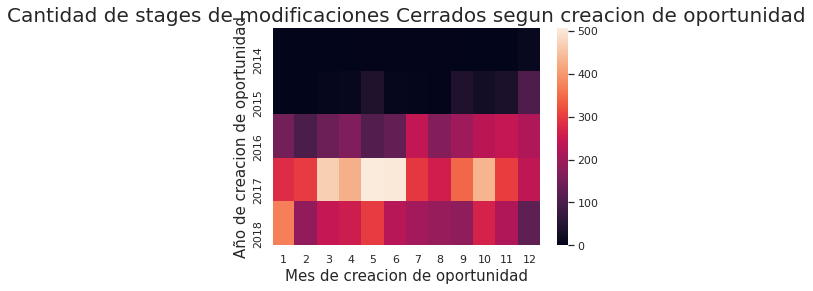

In [65]:
data = cantidadDeTipoDeStagePorTiempo(entrenamiento,'Opportunity_Created_Date')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages de modificaciones Cerrados segun " + descripcion)
data.head(10)

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2014,0.00,0.00,3.00,0.00,1.00,0.00,2.00,0.00,9.00,6.00,0.00,2.00
2015,9.00,6.00,6.00,40.00,14.00,21.00,43.00,39.00,193.00,63.00,110.00,192.00
2016,307.00,273.00,188.00,141.00,195.00,143.00,164.00,106.00,146.00,192.00,111.00,291.00
2017,170.00,189.00,245.00,213.00,251.00,315.00,143.00,127.00,190.00,235.00,205.00,269.00
2018,256.00,217.00,175.00,135.00,177.00,161.00,202.00,147.00,81.00,124.00,110.00,60.00


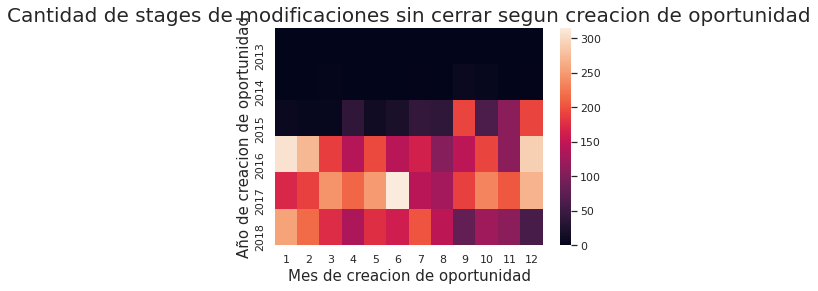

In [66]:
data = cantidadDeTipoDeStagePorTiempo(entrenamiento,'Opportunity_Created_Date',invertir=True)
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages de modificaciones sin cerrar segun " + descripcion)
data.head(10)

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2014,0.00,0.00,0.00,0.00,1.00,1.00,0.00,2.00,0.00,1.00,0.00,2.00
2015,0.00,1.00,3.00,3.00,5.00,2.00,4.00,3.00,12.00,10.00,26.00,59.00
2016,69.00,58.00,81.00,71.00,61.00,79.00,93.00,118.00,109.00,136.00,135.00,170.00
2017,139.00,165.00,237.00,212.00,275.00,260.00,194.00,181.00,155.00,190.00,121.00,121.00
2018,157.00,94.00,111.00,116.00,140.00,118.00,141.00,110.00,124.00,174.00,139.00,83.00


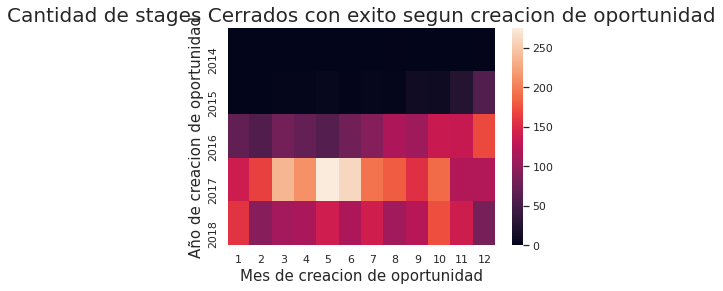

In [67]:
data = cantidadDeTipoDeStagePorTiempo(agrupacion,'Opportunity_Created_Date',columna='Won')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages Cerrados con exito segun " + descripcion)
data.head(10)

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2014,0.00,0.00,2.00,0.00,2.00,1.00,2.00,2.00,3.00,7.00,0.00,4.00
2015,4.00,6.00,9.00,42.00,10.00,19.00,35.00,19.00,103.00,48.00,73.00,143.00
2016,167.00,157.00,165.00,138.00,167.00,172.00,243.00,213.00,227.00,271.00,234.00,415.00
2017,265.00,321.00,437.00,362.00,477.00,487.00,305.00,290.00,308.00,322.00,211.00,260.00
2018,287.00,235.00,222.00,210.00,260.00,212.00,266.00,208.00,178.00,256.00,208.00,100.00


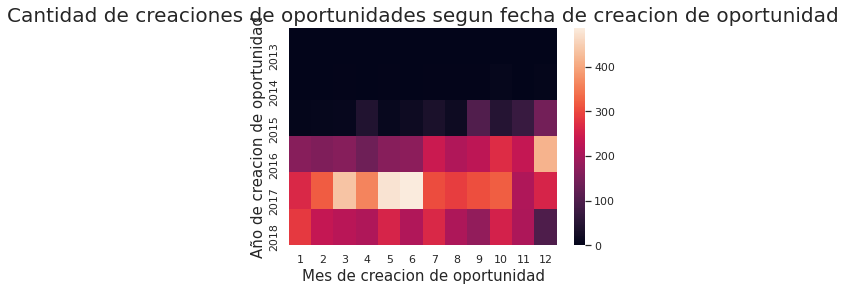

In [68]:
data = cantidadDeStageTotalesPorTiempo(agrupacion,'Opportunity_Created_Date')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de creaciones de oportunidades segun fecha de " + descripcion)
data.head(10)

#### Quote_Expiry_Date

In [69]:
descripcion = "vencimiento del presupuesto"

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2015,2.00,0.00,0.00,10.00,2.00,4.00,36.00,2.00,1.00,9.00,8.00,36.00
2016,134.00,84.00,164.00,145.00,103.00,123.00,150.00,167.00,245.00,184.00,225.00,308.00
2017,199.00,180.00,527.00,325.00,352.00,548.00,268.00,211.00,379.00,279.00,332.00,297.00
2018,225.00,116.00,193.00,218.00,208.00,177.00,181.00,127.00,131.00,146.00,152.00,108.00
2019,32.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


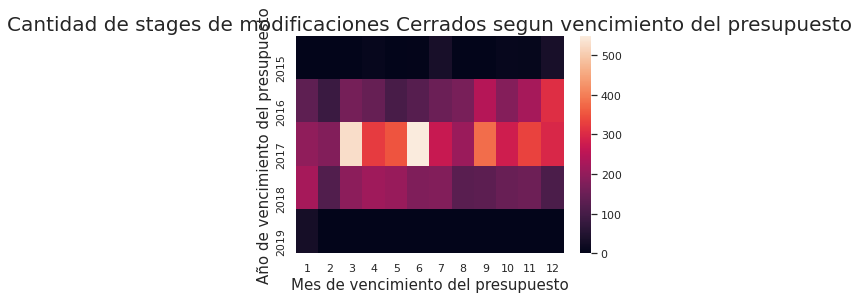

In [70]:
data = cantidadDeTipoDeStagePorTiempo(entrenamiento,'Quote_Expiry_Date')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages de modificaciones Cerrados segun " + descripcion)
data.head(10)

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
2015,1.00,3.00,3.00,6.00,18.00,9.00,10.00,11.00,10.00,23.00,41.00,46.00
2016,48.00,48.00,91.00,58.00,41.00,72.00,61.00,60.00,45.00,113.00,84.00,183.00
2017,109.00,110.00,180.00,135.00,161.00,227.00,215.00,91.00,109.00,157.00,113.00,177.00
2018,154.00,104.00,140.00,87.00,171.00,131.00,126.00,98.00,89.00,93.00,102.00,56.00
2019,29.00,3.00,2.00,4.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00


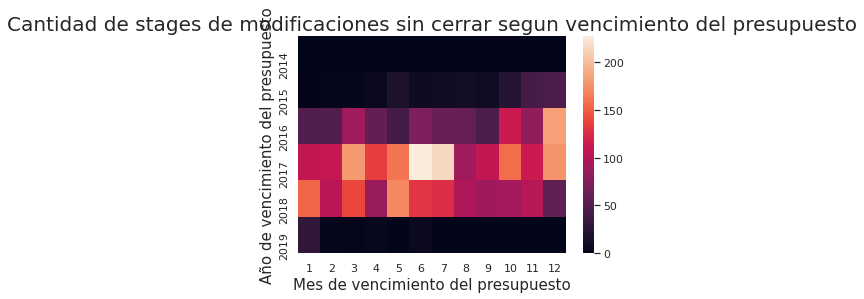

In [71]:
data = cantidadDeTipoDeStagePorTiempo(entrenamiento,'Quote_Expiry_Date',invertir=True)
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages de modificaciones sin cerrar segun " + descripcion)
data.head(10)

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2015,1.00,0.00,0.00,3.00,1.00,3.00,1.00,1.00,1.00,8.00,6.00,27.00
2016,68.00,49.00,69.00,59.00,47.00,75.00,65.00,80.00,146.00,89.00,127.00,198.00
2017,107.00,87.00,287.00,158.00,156.00,290.00,156.00,112.00,210.00,130.00,130.00,171.00
2018,107.00,64.00,91.00,95.00,107.00,111.00,114.00,84.00,77.00,95.00,112.00,78.00
2019,12.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


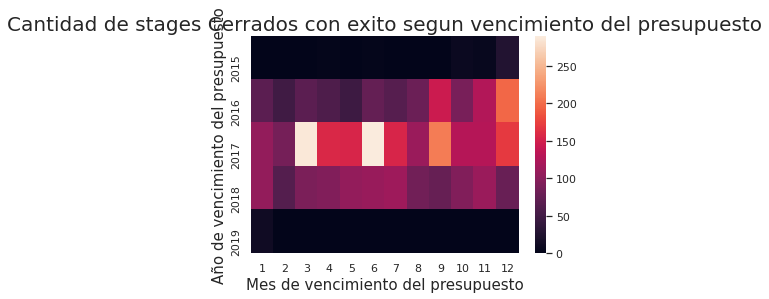

In [72]:
data = cantidadDeTipoDeStagePorTiempo(agrupacion,'Quote_Expiry_Date',columna='Won')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages Cerrados con exito segun " + descripcion)
data.head(10)

mes,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00
anio,,,,,,,,,,,,
"2,014.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
"2,015.00",2.00,3.00,3.00,8.00,19.00,12.00,8.00,4.00,10.00,25.00,31.00,56.00
"2,016.00",110.00,95.00,129.00,109.00,76.00,137.00,112.00,138.00,188.00,170.00,181.00,341.00
"2,017.00",198.00,179.00,421.00,255.00,272.00,463.00,315.00,189.00,301.00,252.00,214.00,291.00
"2,018.00",218.00,140.00,184.00,162.00,223.00,200.00,204.00,165.00,137.00,171.00,194.00,119.00
"2,019.00",22.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


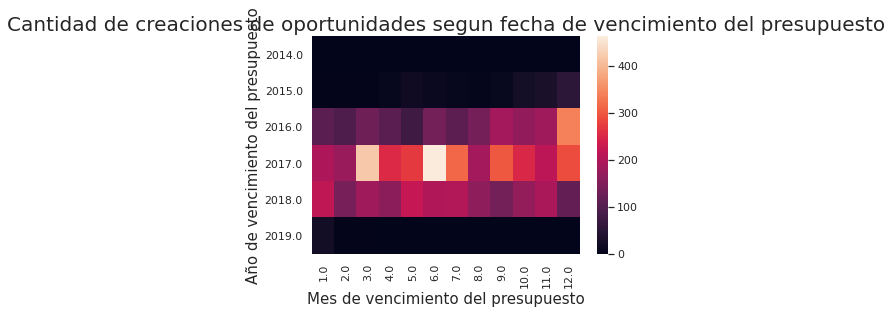

In [73]:
data = cantidadDeStageTotalesPorTiempo(agrupacion,'Quote_Expiry_Date')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de creaciones de oportunidades segun fecha de " + descripcion)
data.head(10)

#### Account_Created_Date

In [74]:
descripcion = "creacion de cuenta de clientes"

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2013,0.00,0.00,0.00,0.00,0.00,0.00,"2,023.00",162.00,654.00,314.00,21.00,24.00
2014,69.00,90.00,2.00,19.00,30.00,60.00,39.00,37.00,251.00,15.00,10.00,56.00
2015,10.00,34.00,55.00,"1,921.00",4.00,136.00,77.00,2.00,25.00,108.00,3.00,430.00
2016,285.00,56.00,162.00,125.00,86.00,165.00,155.00,106.00,277.00,46.00,43.00,99.00
2017,114.00,108.00,91.00,38.00,180.00,119.00,71.00,48.00,43.00,42.00,29.00,76.00
2018,21.00,23.00,11.00,22.00,31.00,34.00,48.00,51.00,12.00,15.00,12.00,8.00


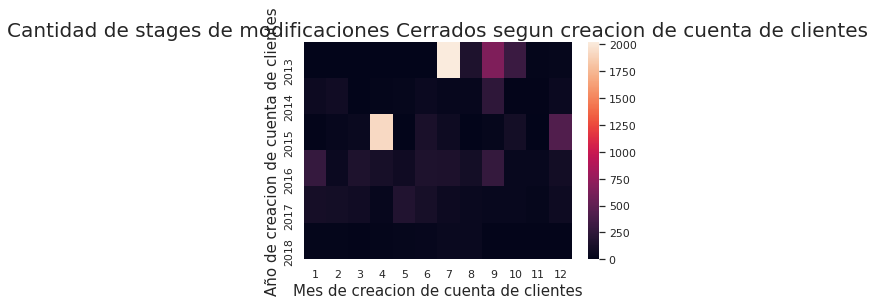

In [79]:
data = cantidadDeTipoDeStagePorTiempo(entrenamiento,'Account_Created_Date')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages de modificaciones Cerrados segun " + descripcion)
data.head(10)

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2013,0.00,0.00,0.00,0.00,0.00,0.00,909.00,170.00,130.00,78.00,24.00,41.00
2014,59.00,117.00,26.00,11.00,42.00,50.00,21.00,27.00,250.00,41.00,30.00,29.00
2015,14.00,53.00,59.00,"1,312.00",59.00,138.00,81.00,34.00,124.00,82.00,39.00,127.00
2016,82.00,74.00,170.00,101.00,111.00,210.00,123.00,88.00,188.00,98.00,122.00,143.00
2017,83.00,163.00,154.00,75.00,190.00,120.00,104.00,46.00,66.00,43.00,76.00,131.00
2018,42.00,61.00,35.00,36.00,36.00,45.00,99.00,41.00,16.00,42.00,14.00,9.00


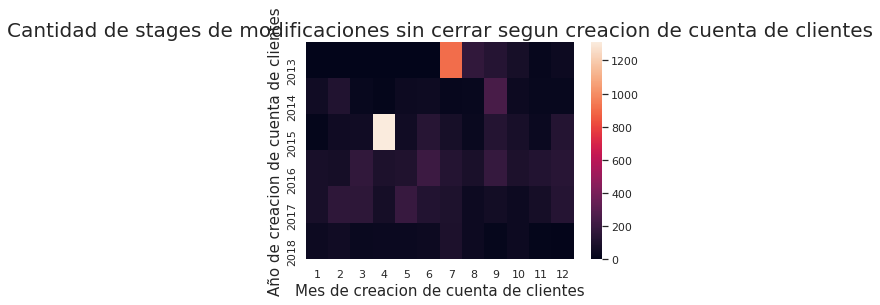

In [80]:
data = cantidadDeTipoDeStagePorTiempo(entrenamiento,'Account_Created_Date',invertir=True)
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages de modificaciones sin cerrar segun " + descripcion)
data.head(10)

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2013,0.00,0.00,0.00,0.00,0.00,0.00,"1,133.00",75.00,402.00,245.00,16.00,10.00
2014,63.00,65.00,2.00,13.00,18.00,34.00,37.00,15.00,146.00,13.00,6.00,54.00
2015,9.00,21.00,37.00,430.00,2.00,96.00,72.00,2.00,14.00,63.00,3.00,162.00
2016,84.00,39.00,109.00,71.00,58.00,124.00,77.00,88.00,173.00,39.00,35.00,62.00
2017,77.00,39.00,56.00,24.00,125.00,90.00,52.00,41.00,33.00,38.00,21.00,45.00
2018,14.00,17.00,9.00,16.00,22.00,22.00,34.00,40.00,11.00,13.00,10.00,6.00


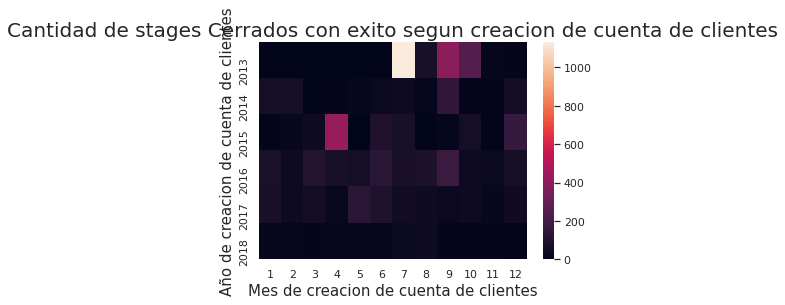

In [77]:
data = cantidadDeTipoDeStagePorTiempo(agrupacion,'Account_Created_Date',columna='Won')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de stages Cerrados con exito segun " + descripcion)
data.head(10)

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2013,0.00,0.00,0.00,0.00,0.00,0.00,"1,745.00",195.00,510.00,310.00,33.00,40.00
2014,106.00,149.00,16.00,20.00,49.00,65.00,55.00,34.00,239.00,48.00,23.00,81.00
2015,18.00,61.00,87.00,807.00,53.00,186.00,135.00,30.00,105.00,130.00,36.00,247.00
2016,144.00,102.00,243.00,139.00,160.00,302.00,164.00,169.00,288.00,115.00,133.00,167.00
2017,148.00,140.00,168.00,82.00,245.00,194.00,133.00,78.00,87.00,70.00,62.00,111.00
2018,46.00,55.00,37.00,47.00,44.00,55.00,95.00,68.00,26.00,38.00,17.00,6.00


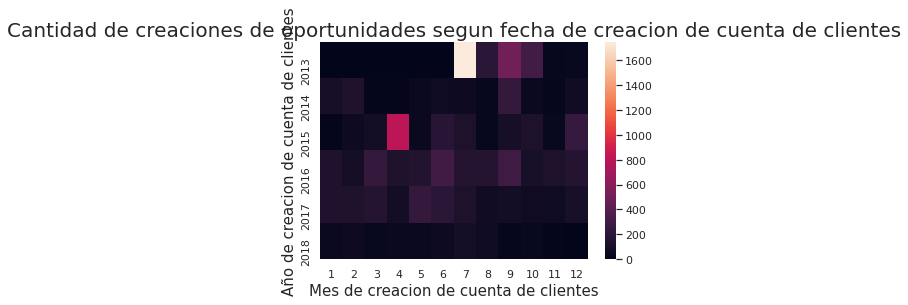

In [78]:
data = cantidadDeStageTotalesPorTiempo(agrupacion,'Account_Created_Date')
graficarTipoDeStagePorTiempo(data,descripcion,"Cantidad de creaciones de oportunidades segun fecha de " + descripcion)
data.head(10)

### stage por tipos

In [81]:
def categorias(df,categorias):
    #if (stageConDicionCerrada):
    #    stage = 'Closed'
    #else:
    #    stage = 'Stage'
    df = df.groupby(categorias).agg({'Stage':'value_counts'})
    df.columns = ['cantidad']
    return df
"""
def graficoCategoricoEnArbol(df):#FALLA REVISAR
    data = df.copy()
    data = data.reset_index()
    columnas = data.columns[:-1]
    fig = px.treemap(data, 
                 path=columnas, 
                 values='cantidad'
                )
    fig.show()
    return
"""

"\ndef graficoCategoricoEnArbol(df):#FALLA REVISAR\n    data = df.copy()\n    data = data.reset_index()\n    columnas = data.columns[:-1]\n    fig = px.treemap(data, \n                 path=columnas, \n                 values='cantidad'\n                )\n    fig.show()\n    return\n"

In [82]:
categoria = ['Product_Type','Product_Category_B']
data = categorias(entrenamiento,categoria)
#graficoCategoricoEnArbol(data)
data.reset_index().head(10)

,Product_Type,Product_Category_B,Stage,cantidad
0,None,None,Closed Won,9533
1,None,None,Closed Lost,6328
2,None,None,Proposal,35
3,None,None,Negotiation,18
4,None,None,Qualification,11
5,None,Product_Category_B_1,Closed Lost,1
6,None,Product_Category_B_16,Closed Lost,3
7,None,Product_Category_B_19,Closed Lost,2
8,None,Product_Category_B_7,Closed Lost,4
9,Other,None,Closed Lost,1


### stage por numericos

In [83]:
def stagePorNumerico(df,colValor):
    data = df[[colValor,'Stage']]
    data = data[data[colValor] != "None"]
    data = data[data[colValor] != "Other"]
    data = data.dropna(subset = [colValor])#elimino las filas sin valores
    data[colValor] = data[colValor].astype('float')
    listaDePosibles = ["Proposal", "Closed Lost", "Closed Won", "Negotiation", "Qualification"]
    for posible in listaDePosibles:
        data.loc[data['Stage'] == posible, posible] = data[colValor]
    data = data[listaDePosibles]
    return data

def stageCerradoPorNumerico(df,colValor):
    data = df[[colValor,'Closed']]
    data = data[data[colValor] != "None"]
    data = data[data[colValor] != "Other"]
    data = data.dropna(subset = [colValor])#elimino las filas sin valores
    data[colValor] = data[colValor].astype('float')
    data.loc[data['Closed'], "cerrado"] = data[colValor]
    data.loc[data['Closed'] == False, "abierta"] = data[colValor]
    data = data[["cerrado","abierta"]]
    return data

def graficoDensidad(df):
    df.plot.hist(bins=12, alpha=0.5)
    return

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 3 to 16132
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Proposal       0 non-null      float64
 1   Closed Lost    356 non-null    float64
 2   Closed Won     0 non-null      float64
 3   Negotiation    0 non-null      float64
 4   Qualification  0 non-null      float64
dtypes: float64(5)
memory usage: 16.7 KB


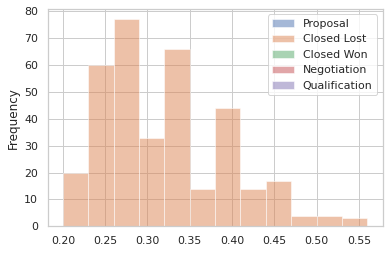

In [84]:
data = stagePorNumerico(entrenamiento,'Price')
graficoDensidad(data)
#data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 3 to 16132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cerrado  356 non-null    float64
 1   abierta  0 non-null      float64
dtypes: float64(2)
memory usage: 8.3 KB


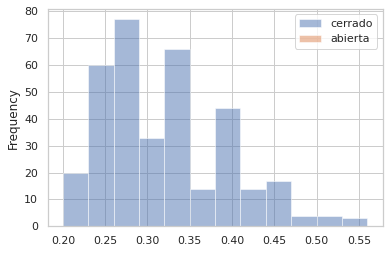

In [85]:
data = stageCerradoPorNumerico(entrenamiento,'Price')
graficoDensidad(data)
#data.head(10)
data.info()

In [86]:
# pruevas
#entrenamiento['Total_Power'].value_counts()
entrenamiento['Stage'].head(10)

0    Closed Lost
1     Closed Won
2     Closed Won
3    Closed Lost
4    Closed Lost
5    Closed Lost
6    Closed Lost
7     Closed Won
8    Closed Lost
9    Closed Lost
Name: Stage, dtype: object

### mapa

In [87]:
def porID(df):
  data = df.groupby(['Territory']).agg(
      {'Price':['sum','mean'],'Won':['sum','mean'],
       'ASP_(converted)':['sum','mean'],'Closed':['sum','mean'],
       'Opportunity_Created_Date':['min','max']})
  data.reset_index()
  level0 = data.columns.get_level_values(0)
  level1 = data.columns.get_level_values(1)
  data.columns = level0 + '_' + level1
  """data.rename(columns={'Price_sum':'Precio Total','Price_mean':'Precio Promedio',
                       'Won_sum':'Ganados Total','Won_mean':'Ganados Promedio',
                       'ASP_(converted)_sum':'ASP Total','ASP_(converted)_mean':'ASP Promedio',
                       'Closed_sum':'Cerrados Total','Closed_mean':'Cerrados Promedio',
                       'Opportunity_Created_Date_min':'Inicio de oportunidades','Opportunity_Created_Date_max':'Ultima nueva oportunidad'})"""
  data.columns=['Precio Total','Precio Promedio',
                       'Ganados Total','Ganados Promedio',
                       'ASP Total','ASP Promedio',
                       'Cerrados Total','Cerrados Promedio',
                       'Inicio de oportunidades','Ultima nueva oportunidad']
  data['Territory'] = data.index
  data = data.rename_axis(None)
  regiones = df[['Territory','Region']].drop_duplicates()
  data = data.merge(regiones,on='Territory',how='inner')
  data = data[data['Territory'] != "None"]
  data = data.drop_duplicates('Territory')
  return data

In [88]:
def mapa(datos):
  fig = go.Figure(go.Choropleth(
    locations = datos['Territory'],
    locationmode = "country names",
    z = datos['Ganados Promedio']*100,
    text = datos['Ganados Total'],
    colorscale = 'Hot',
    autocolorscale = False,
    reversescale = True,
    marker_line_color = '#efefef',
    marker_line_width = 0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Porcentage Ganados',
    )
  )
  fig.update_layout(
    title_text = 'Porcentages de oportunidades ganadas',
    showlegend = False,
    width = 1000,
    height = 800,
    geo = dict(
        scope = 'world',
        resolution = 50,
        projection_type = 'miller',
        showcoastlines = True,
        showocean = True,
        showcountries = True,
        oceancolor = '#eaeaea',
        lakecolor = '#eaeaea',
        coastlinecolor = '#dadada'
    )
  )
  fig.show()
  return

def lineaDeTiempo(datos):
  colors = ['blue', 'orange', 'green', 'red', 'purple']

  opt = []
  opts = []
  for i in range(0, len(colors)):
      try:
          opt = dict(
              target = datos['Region'][[i]].unique(), value = dict(marker = dict(color = colors[i]))
          )
          opts.append(opt)
      except:
        break


  data = [dict(
    type = 'scatter',
    mode = 'markers',
    x = datos['Inicio de oportunidades'],
    y = datos['Ultima nueva oportunidad'],
    text = datos['Territory'],
    hoverinfo = 'text',
    opacity = 0.8,
    marker = dict(
        size = datos['Ganados Total']*2,
        sizemode = 'area',
        sizeref = 1
    ),
    transforms = [
        dict(
          type = 'groupby',
          groups = datos['Region'],
          styles = opts
        ),
        dict(
          type = 'aggregate',
          groups = datos['Territory'],
          aggregations = [
              dict(target = 'x', func = 'avg'),
              dict(target = 'y', func = 'avg'),
              dict(target = 'marker.size', func = 'sum')
          ]
        )]
  )]

  layout = dict(
      title = '<b>Oportunidades</b><br>cerradas con exito ordenadas segun nuevas oportunidades',
      xaxis=dict(
          title="Inicio de nuevas oportunidades"
      ),
      yaxis=dict(
          title="Ultima nueva oportunidad"
      ),
      width = 1720,
      height = 980,
      uniformtext_mode='hide'
  )

  fig_dict = dict(data=data, layout=layout)
  pio.show(fig_dict, validate=False)
  return

In [89]:
data = porID(entrenamiento)
data.head(10)

,Precio Total,Precio Promedio,Ganados Total,Ganados Promedio,ASP Total,ASP Promedio,Cerrados Total,Cerrados Promedio,Inicio de oportunidades,Ultima nueva oportunidad,Territory,Region
0,0.00,nan,0,0.00,0.86,0.43,2,1.00,2017-11-30,2017-12-07,Albania,EMEA
1,0.00,nan,0,0.00,0.80,0.40,2,1.00,2016-12-08,2016-12-08,Armenia,EMEA
2,0.96,0.32,696,0.58,462.26,0.38,1202,1.00,2015-04-23,2018-12-20,Australia,APAC
3,0.96,0.24,124,0.86,66.22,0.46,145,1.00,2015-07-23,2018-11-27,Austria,EMEA
4,0.00,nan,0,0.00,2.02,0.51,4,1.00,2015-08-12,2016-12-09,Belarus,EMEA
5,2.51,0.31,187,0.66,119.79,0.42,285,1.00,2015-12-18,2018-12-08,Belgium,EMEA
6,0.00,nan,0,0.00,1.91,0.48,4,1.00,2016-10-21,2016-10-25,Bosnia & Herzegovina,EMEA
7,0.00,nan,1,0.20,1.97,0.39,5,1.00,2016-11-29,2018-07-19,Bulgaria,EMEA
8,0.34,0.34,0,0.00,0.39,0.39,1,1.00,2018-01-17,2018-01-17,Burma,APAC
9,0.00,nan,2,0.50,1.81,0.45,4,1.00,2015-08-18,2018-06-28,Cambodia,APAC


In [90]:

#data.Territory
print(list(data.Territory))

['Albania', 'Armenia', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Burma', 'Cambodia', 'Canada', 'Carribean', 'Central America', 'China (PRC)', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kosovo', 'Kuwait', 'Lebanon', 'Luxembourg', 'Macedonia', 'Malaysia', 'Malta', 'Monaco', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'Singapore', 'Slovenia', 'Solomon Islands', 'South America', 'South East Asia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'UAE (Dubai)', 'UAE (Others)', 'USA', 'Ukraine', 'United Kingdom', 'Vietnam']


In [91]:
mapa(data)

In [93]:
dataEntrante = data[data['Ganados Promedio'] > 0.05]
dataEntrante = dataEntrante[dataEntrante['Ganados Total'] > 10]
dataEntrante.reset_index()
lineaDeTiempo(dataEntrante)

In [94]:
entrenamiento.Total_Amount

0               5,272,800.00
1                  48,230.00
2                  83,865.60
3               7,421,881.50
4              13,357,192.50
                ...         
16942             103,350.00
16943              93,015.00
16944             103,350.00
16945           2,346,796.88
16946          25,603,200.00
Name: Total_Amount, Length: 16947, dtype: float64

### ganados perdidos segun cantidad de veces que se modifico la oportunidad

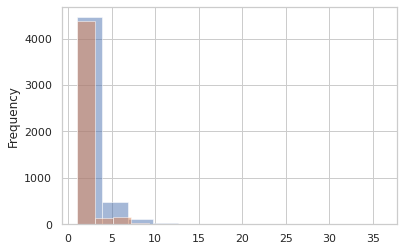

In [ ]:
def histogramaDeModificaciones(df):
  data = df[['modificaciones','Won','Lost']]
  data['Won'] = data['Won'] * data['modificaciones']
  data['Lost'] = data['Lost'] * data['modificaciones']
  data = data[['Won','Lost']]
  data['Won'][data['Won'] > 0].plot.hist(bins=12, alpha=0.5)
  data['Lost'][data['Lost'] > 0].plot.hist(bins=12, alpha=0.5)
  return data

data = histogramaDeModificaciones(agrupacion)
#data.value_counts()

### Distribución de precio según estados closed

In [ ]:
entrenamientoEstadosClosed = entrenamiento[(entrenamiento['Stage'] == 'Closed Lost') | (entrenamiento['Stage'] == 'Closed Won')]

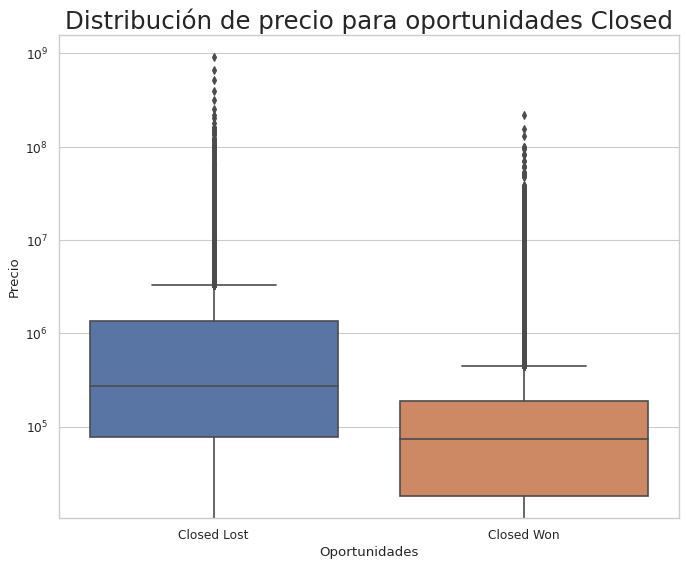

In [ ]:
def boxplotParaPrecioSegunEstadoDeClosed(df):
  #Boxplot para precio según estado de closed
  plt.figure(figsize=(10,8), dpi= 80)
  df['Stage']
  boxplot = sns.boxplot(x='Stage', y='Total_Amount', data=df)
  plt.title('Distribución de precio para oportunidades Closed', fontsize=22)
  boxplot.set_xlabel('Oportunidades')
  boxplot.set_ylabel('Precio')
  boxplot.set(yscale="log")
  plt.show()
boxplotParaPrecioSegunEstadoDeClosed(entrenamientoEstadosClosed)

### Oportunidades exitosas cerradas según país

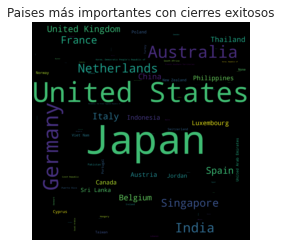

In [ ]:
def wordcloudDeTrueKeysEnBaseASuOcurrencia(df):
  #Wordcloud de True keys en base a su ocurrencia
  freqWonKeys = df.Billing_Country.value_counts()
  wordcloud = WordCloud(width=2000,height=2000, max_words=len(freqWonKeys),normalize_plurals=False).generate_from_frequencies(freqWonKeys)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title('Paises más importantes con cierres exitosos')
  plt.show()
wordcloudDeTrueKeysEnBaseASuOcurrencia(entrenamientoEstadosClosed)

### Oportunidades Cerradas cerradas según país

In [ ]:
entrenamiento['Delivery_Quarter'] = entrenamiento['Delivery_Quarter'].replace({'Q2': 2, 'Q1': 1, 'Q4': 4, 'Q3': 3})

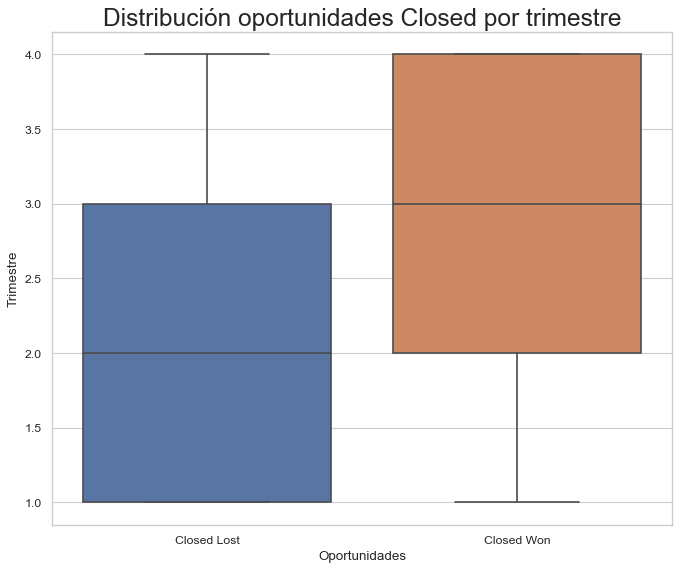

In [ ]:
#Boxplot para precio según estado de closed
plt.figure(figsize=(10,8), dpi= 80)
boxplot = sns.boxplot(x='Stage', y='Delivery_Quarter', data=entrenamiento)
plt.title('Distribución oportunidades Closed por trimestre', fontsize=22)
boxplot.set_xlabel('Oportunidades')
boxplot.set_ylabel('Trimestre')
#boxplot.set(yscale="log")
plt.show()